<a href="https://colab.research.google.com/github/nikita1128/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement:**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

Data Description

Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

#**Importing the required libraries**

In [ ]:
#Importing the required libraries

#For data loading and numerical operations
import pandas as pd
import numpy as np

#For data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For converting categorical variable into numerical
from sklearn.preprocessing import LabelEncoder

#For data preparation
from imblearn.over_sampling import SMOTE

#For data splitting
from sklearn.model_selection import train_test_split

#Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#For data scaling
from sklearn.preprocessing import MinMaxScaler

#For scaling
from sklearn.preprocessing import StandardScaler

#For data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

import time

#For metrics evaluatioon
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

#For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.base import clone

#remove warnings
import warnings
warnings.filterwarnings("ignore")


# **Loading the data file**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the data file using read_csv()
cardio_df = pd.read_csv("/content/drive/MyDrive/Alma/Pro/Capstone Project/Copy of data_cardiovascular_risk.csv")

# **Exploratory Data Analysis**

In [ ]:
#Displays the first five rows of the dataset
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
#Displays the last five rows of the dataset
cardio_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
#shape of the dataset
cardio_df.shape

(3390, 17)

In [ ]:
#Printing the rows and columns of a dataset
print ("Rows    : " ,cardio_df.shape[0])
print ("Columns : " ,cardio_df.shape[1])

Rows    :  3390
Columns :  17


In [ ]:
#Printing the list of columns(features) in dataframe
print("Features: \n" ,cardio_df.columns.tolist())

Features: 
 ['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [ ]:
#getting information about the dataset using info() method
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#**Variable Breakdown**

**id:**	Patient identification number

####***Demographic:***

**age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**education:** no further information provided

**sex:** male or female(Nominal)

####***Behavioral:***

**is_smoking:** whether or not the patient is a current smoker (Nominal)

**cigsPerDay:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

####***Information on medical history:***

**BPMeds:** whether or not the patient was on blood pressure medication (Nominal)

**prevalentStroke:** whether or not the patient had previously had a stroke (Nominal)

**prevalentHyp:** whether or not the patient was hypertensive (Nominal)

**diabetes:** whether or not the patient had diabetes (Nominal)

####***Information on current medical condition:***

**totChol:** total cholesterol level (Continuous)

**sysBP:** systolic blood pressure (Continuous)

**diaBP:** diastolic blood pressure (Continuous)

**BMI:** Body Mass Index (Continuous)

**heartRate :** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

**glucose:** glucose level (Continuous)

####***Target variable to predict:***

**TenYearCHD:** 10 year risk of coronary heart disease (CHD),binary variable where “1” means Yes and “0” means No.

#**Handling missing values**

In [ ]:
#checking null values
cardio_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
#Printing number of null(missing) values
print("Missing values :  ", cardio_df.isnull().sum().values.sum())

Missing values :   510


In [ ]:
#calculating the missing percentage of features in the dataset
percent_missing = (cardio_df.isnull().sum()/len(cardio_df)) * 100 
percent_missing.round(2)

id                 0.00
age                0.00
education          2.57
sex                0.00
is_smoking         0.00
cigsPerDay         0.65
BPMeds             1.30
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.12
sysBP              0.00
diaBP              0.00
BMI                0.41
heartRate          0.03
glucose            8.97
TenYearCHD         0.00
dtype: float64

Inference:

From above we can see that there are 510 null/missing value in our dataframe. Numer of null/missing values with their respective percentages are as follows: 

*   education : 87 with 2.57%
*   cigsPerDay : 22 with 0.65%
*   BPMeds : 44 with 1.3%
*   totChol : 38 with 1.12%
*   BMI : 14 with 0.41%
*   heartRate : 1 with 0.03%
*   glucose : 304 with 8.97%

As the missing percentages are low, we will be dropping null values from these columns except 'glucose' column.

In [ ]:
#checking duplicate values
cardio_df.duplicated().sum()

0

#### From above we can see that there are no duplicate values in our dataset.

In [ ]:
#Replacing the null/missing values of "glucose" column with the mode of the data to reduce the number of null/missing values.
cardio_df["glucose"].fillna(cardio_df["glucose"].mode()[0], inplace = True)

In [ ]:
#Making copy of original dataset to do further analysis
cardio_data = cardio_df.copy()

#Dropping irrelevant columns
cardio_data.drop(["id", "education"], axis = 1, inplace = True)

#Dropping all other rows having null/missing values
cardio_data.dropna(inplace = True)
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3272 entries, 1 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3272 non-null   int64  
 1   sex              3272 non-null   object 
 2   is_smoking       3272 non-null   object 
 3   cigsPerDay       3272 non-null   float64
 4   BPMeds           3272 non-null   float64
 5   prevalentStroke  3272 non-null   int64  
 6   prevalentHyp     3272 non-null   int64  
 7   diabetes         3272 non-null   int64  
 8   totChol          3272 non-null   float64
 9   sysBP            3272 non-null   float64
 10  diaBP            3272 non-null   float64
 11  BMI              3272 non-null   float64
 12  heartRate        3272 non-null   float64
 13  glucose          3272 non-null   float64
 14  TenYearCHD       3272 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 409.0+ KB


In [ ]:
#Checking for the unique values in each column
print("Unique values :\n",cardio_data.nunique())

Unique values :
 age                  39
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             236
sysBP               224
diaBP               141
BMI                1242
heartRate            68
glucose             130
TenYearCHD            2
dtype: int64


In [ ]:
#Printing unique values
for col in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']:
    print(f"Unique values in {col} column: ", cardio_data[col].unique())

Unique values in sex column:  ['M' 'F']
Unique values in is_smoking column:  ['NO' 'YES']
Unique values in BPMeds column:  [0. 1.]
Unique values in prevalentStroke column:  [0 1]
Unique values in prevalentHyp column:  [1 0]
Unique values in diabetes column:  [0 1]
Unique values in TenYearCHD column:  [0 1]


###**Converting categorical variables into numerical values using Label Encoder**

In [ ]:
#label_encoder object knows how to understand word labels.
label_encoder = LabelEncoder()

#Assiging categorical variables
cat_col = ['sex','is_smoking']

#Converting categorical variables into numerical
cardio_data[cat_col] = cardio_data[cat_col].apply(label_encoder.fit_transform)
cardio_data.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


#**Descriptive Statistics**

In [ ]:
#Using describe() function to generate descriptive statistics of the data
cardio_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3272.0,49.442237,8.559199,32.00,42.00,49.00,56.000,70.0
sex,3272.0,0.438570,0.496288,0.00,0.00,0.00,1.000,1.0
is_smoking,3272.0,0.493276,0.500031,0.00,0.00,0.00,1.000,1.0
cigsPerDay,3272.0,9.054095,11.866441,0.00,0.00,0.00,20.000,70.0
BPMeds,3272.0,0.029645,0.169633,0.00,0.00,0.00,0.000,1.0
prevalentStroke,3272.0,0.005807,0.075993,0.00,0.00,0.00,0.000,1.0
prevalentHyp,3272.0,0.313264,0.463892,0.00,0.00,0.00,1.000,1.0
diabetes,3272.0,0.025672,0.158180,0.00,0.00,0.00,0.000,1.0
totChol,3272.0,237.036675,45.114324,113.00,206.00,234.00,264.000,696.0
sysBP,3272.0,132.409077,22.123491,83.50,117.00,128.00,143.625,295.0


Inference:

1. As the categorical data of the dataset were already converted into discrete numerical values therefore they are also included in descriptive statistics.
2. Age of the patients in this dataset ranges from 32 to 70.
3. Only 25% of patients in the given dataset are consuming cigarettes on an average of at least 20 cigarettes per day.
4. The average total cholesterol level of the patients in this dataset is 237.03.
5. The minimum and maximum systolic blood pressure of the patients are 83.5 and 295, respectively.
6. The minimum and maximum diastolic blood pressure of the patients are 48 and 142.5, respectively.
7. The minimum and maximum body mass index of the patients are 15.96 and 56.8, respectively.
8. The average heart rate of the patients in this dataset is 75.95.
9. The average glucose level of the patients in this dataset is 81.42.


# **Checking the 10-year risk of coronary heart disease (CHD)**

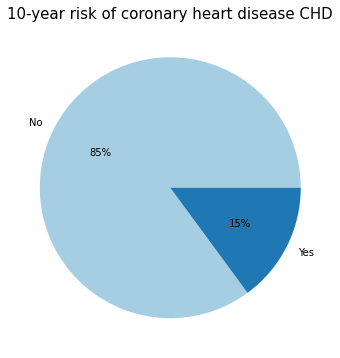

In [ ]:
#setting figure size
fig = plt.figure(figsize=(6,6))

#defining Seaborn color palette
colors = sns.color_palette('Paired')

#Creating labels for the pie chart
labels = "No", "Yes"

#create pie chart
plt.pie(cardio_data['TenYearCHD'].value_counts(), labels = labels, colors = colors, autopct='%.0f%%')

#To display title of the pie chart
plt.title("10-year risk of coronary heart disease CHD", fontsize= 15)
plt.show()

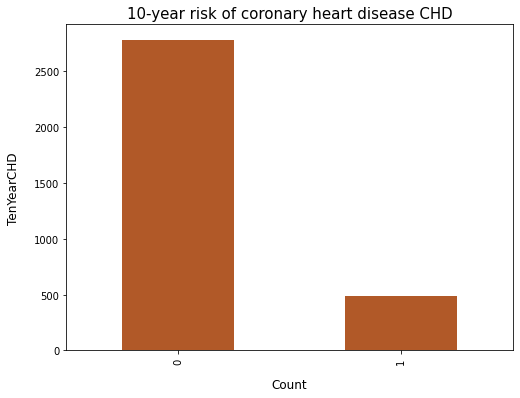

In [ ]:
#Bar chart to display target variable
cardio_data['TenYearCHD'].value_counts().plot(kind='bar', colormap = 'Paired_r', figsize=(8, 6))

#To display the x label, y label and title of the bar chart
plt.xlabel("Count", labelpad=14, fontsize = 12)
plt.ylabel("TenYearCHD", labelpad=14, fontsize = 12)
plt.title("10-year risk of coronary heart disease CHD", fontsize = 15)
plt.show()

In [ ]:
#Checking the value count of our target variable
cardio_data['TenYearCHD'].value_counts()

0    2784
1     488
Name: TenYearCHD, dtype: int64

Inference:

1. From above observation, we can conclude that our dataset is not balanced i.e. Yes is 488 (~15%) and No is 2784 ( ~86%). 
2. So we will analyze the data with other features while taking the target values separately to get some insights.
3. Analysis shows that ten year risk of coronary heart disease(CHD) of patients in the given dataset is 15% where the number of negative cases outweighs the number of positive cases leading to a class imbalance problem while fitting our models.Therefore, this problem needs to be addressed and taken care of.

#**10-year risk of CHD according to categorical variables**

In [ ]:
#creating the list of categorical variables for visualization
cat_variables = ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

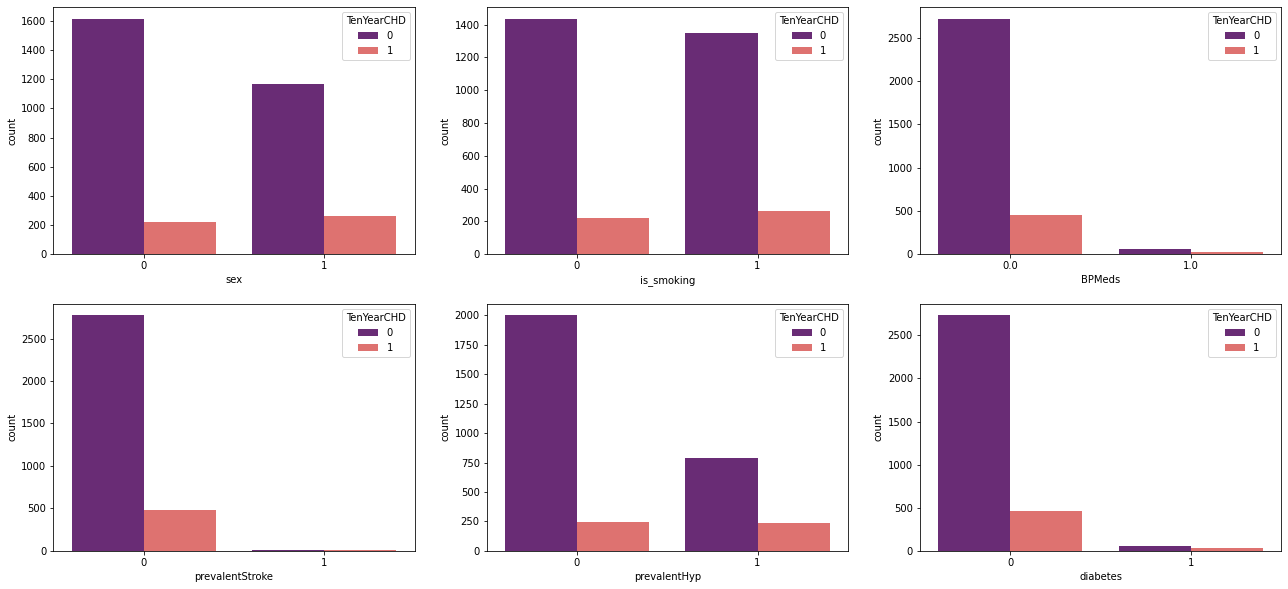

In [ ]:
#setting up the visualization for plotting categorical variables
row, col = 2, 3
f, ax = plt.subplots(row, col, figsize = (22, 10))

#count plot to display target variable according to categorical variables
for i, var in enumerate(cat_variables):
    row = i//col
    pos = i % col 
    viz = sns.countplot(data = cardio_data, x = var, hue = 'TenYearCHD', palette = "magma", ax = ax[row][pos])

plt.show()

Inference:
1. From above count plots, we can observe that BPmeds, prevalentStroke and diabetes are highly imbalanced.
2. The number of females not affected by CHD is more than the number of males.
3. The number of current smokers and non-smokers is almost the same.
4. Non-hypertensive patients not affected by CHD are more than hypertensive patients.

According to my hypothesis:
1. Female patients are less prone to the 10-year risk of future coronary heart disease (CHD).
2. Patients taking blood pressure medication are having low risk of CHD as compared to those who are not taking medication.

# **10-year risk of CHD according to numerical variables**

In [ ]:
#creating a list of numerical variables for visualization
num_variables = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

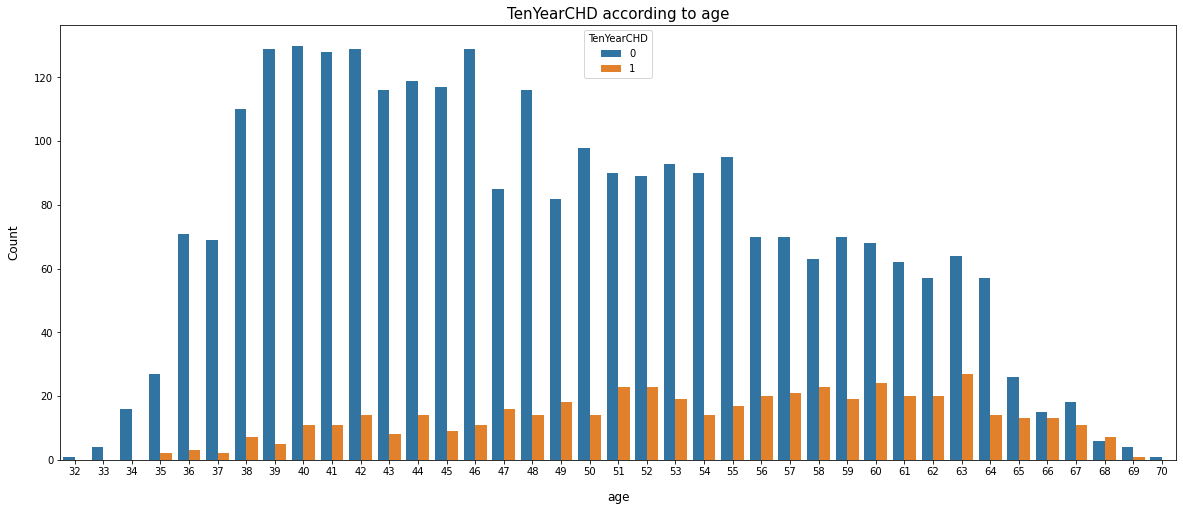

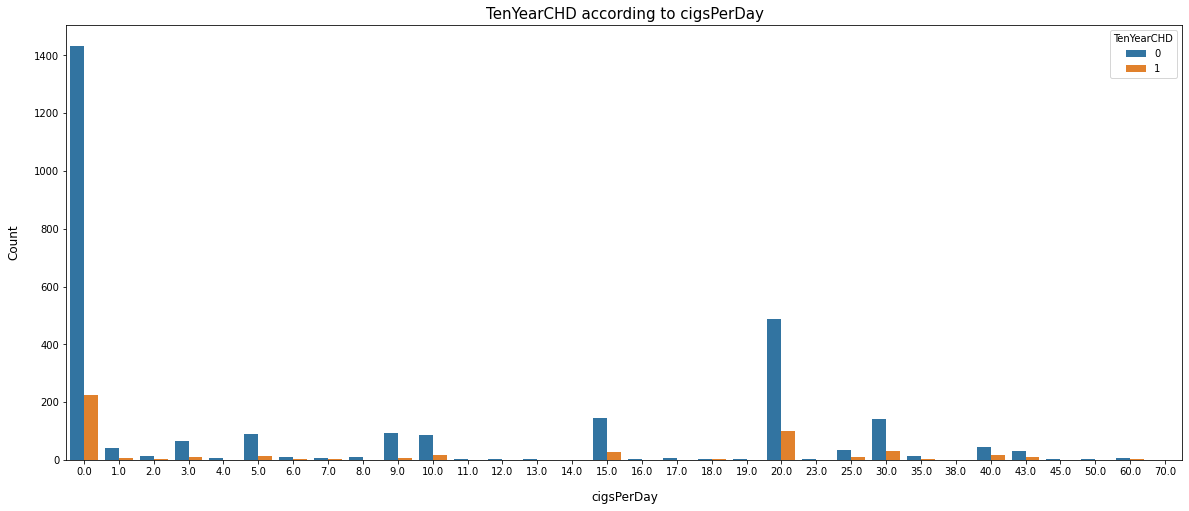

In [ ]:
#count plot to display target variable according to numerical variables using for-loop
for var in num_variables[:2]:
    #setting figure size
    fig = plt.figure(figsize=(20,8))

    #creating count plot
    sns.countplot(data = cardio_data, x = var, hue ='TenYearCHD')

    #To display the x label, y label and title of the count plot
    plt.xlabel(var, labelpad=14, fontsize = 12)
    plt.ylabel("Count", labelpad=14, fontsize = 12)
    plt.title(f"TenYearCHD according to {var}", fontsize = 15)
    plt.show()

Inference:

1. Age groups ranging from 51 to 63 are more affected by CHD and age groups ranging from 32 to 37 are less affected by CHD.
2. Patients who are not smoking per day on an average are more affected by CHD on the contrary these patients are least affected by CHD. 
3. Patients who are smoking 20  cigarettes per day on an average are more affected by CHD.

According to my hypothesis:

1. Patients in their 50s and 60s are more prone to the 10-year risk of future coronary heart disease (CHD).
2. Patients who are not consuming  cigarettes per day on an average are at high risk of CHD indicating that there are factors other than smoking causing CHD.

####Using violin plot to get better visualization of remaining numerical variables. 

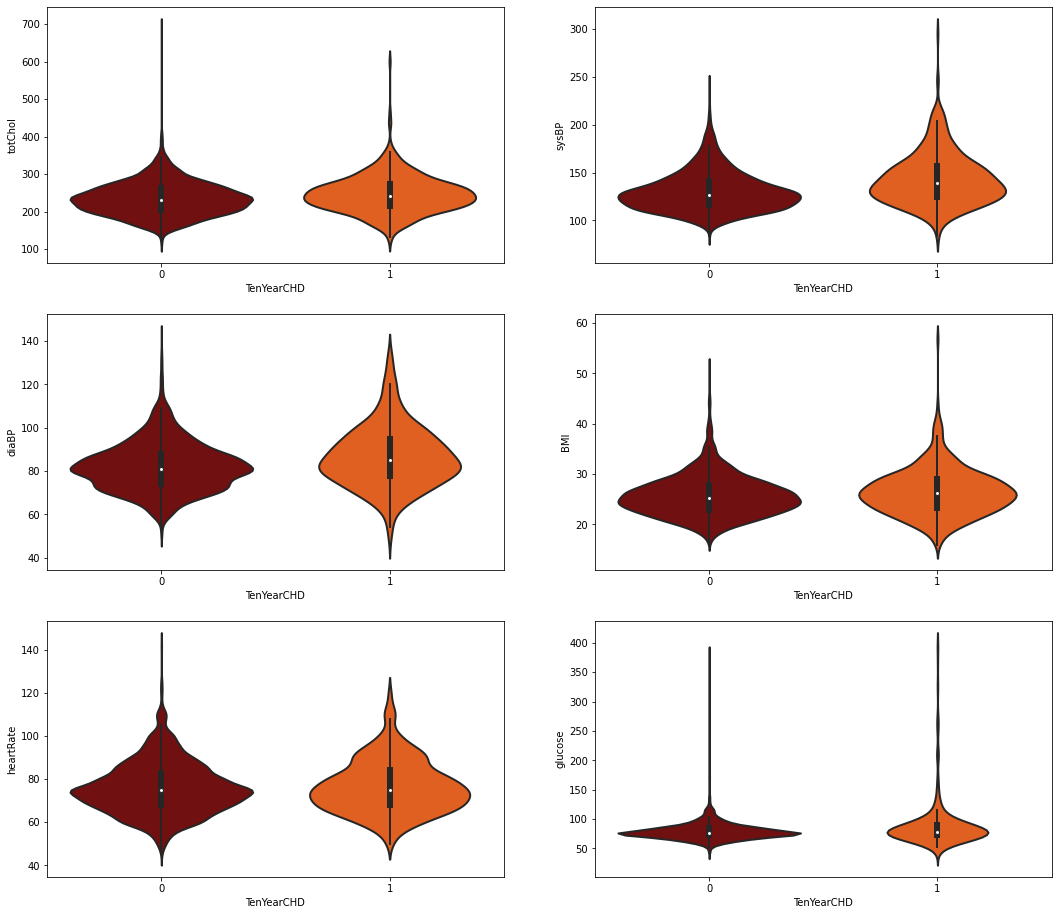

In [ ]:
#setting up the visualization for plotting numerical variables
row, col = 3, 2
f, ax = plt.subplots(row, col, figsize = (18, 16))


#setting the visualization of violin plot to display target variable according to selected numerical variables
for i, var in enumerate(num_variables[2:]):
    row = i//col
    pos = i % col 

    #creating violin plot
    sns.violinplot(y = var, x = 'TenYearCHD', data = cardio_data, palette = "gist_heat",
                   linewidth=2, ax = ax[row][pos])
    
plt.show()

Inference:

Majority portion of numerical variables affected by target variable lie in the following ranges:

1. totChol : 150 to 350 
2. sysBP : 100 to 175
3. diaBP : 65 to 110
4. BMI : 17 to 32
5. heartRate : 55 to 100
6. glucose : 50 to 110

# **Relation between age and total cholesterol.**

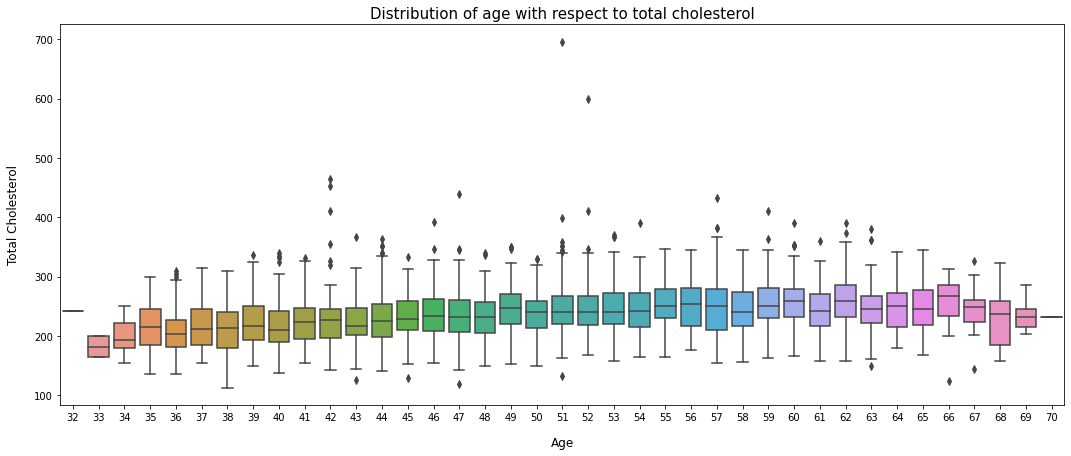

In [ ]:
#setting figure size
plt.figure(figsize=(18,7))

#creating boxplot
sns.boxplot(x = "age", y = "totChol", data = cardio_data)

#To display the x label, y label and title of the box plot
plt.xlabel("Age", labelpad=14, fontsize = 12)
plt.ylabel("Total Cholesterol", labelpad=14, fontsize = 12)
plt.title("Distribution of age with respect to total cholesterol", size = 15)
plt.show()

Inference:

1. From the above observation, we can infer that the boxplots are shifted in an upward manner representing that cholesterol level increases with the increase in age.

According to my hypothesis:
1. Aged people have more cholesterol i.e. bad cholesterol in general. 

# **Relation among cigsPerDay, totChol, sysBP and heartRate based on age.**




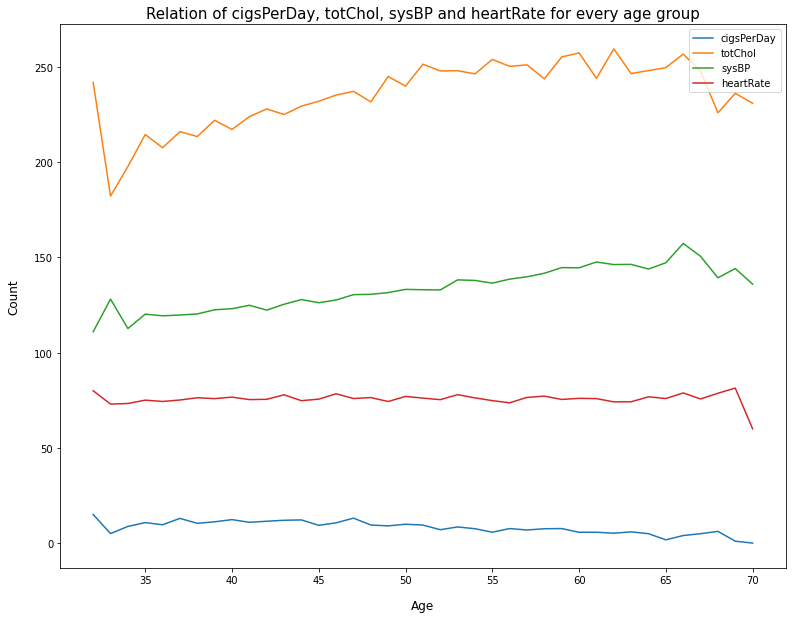

In [ ]:
#Plotting a line chart to check the relationship between cigsPerDay, totChol, sysBP and heartRate.

#creating different series for average value of cigsPerDay, totChol, sysBP and heartrate based on age
line_1 = cardio_data.groupby("age").cigsPerDay.mean()
line_2 = cardio_data.groupby("age").totChol.mean()
line_3 = cardio_data.groupby("age").sysBP.mean()
line_4 = cardio_data.groupby("age").heartRate.mean()

#setting figure size
plt.figure(figsize=(13,10))

#creating line chart 
sns.lineplot(data = line_1, label = "cigsPerDay")
sns.lineplot(data = line_2, label = "totChol")
sns.lineplot(data = line_3, label = "sysBP")
sns.lineplot(data = line_4, label = "heartRate")

#To display the x label, y label and title of the line chart
plt.xlabel("Age", labelpad=14, fontsize = 12)
plt.ylabel("Count", labelpad=14, fontsize = 12)
plt.title(f"Relation of cigsPerDay, totChol, sysBP and heartRate for every age group", fontsize = 15)
plt.show()

Inference:

1. The variable cigsPerDay and heartRate have a fairly parallel relationship with age but slightly decrease with the increase of age.

2. Total cholesterol level and systolic blood pressure of the patient are moving in an increasing manner w.r.t. age. 
 

# **Checking frequency distribution of numerical variables using histogram**

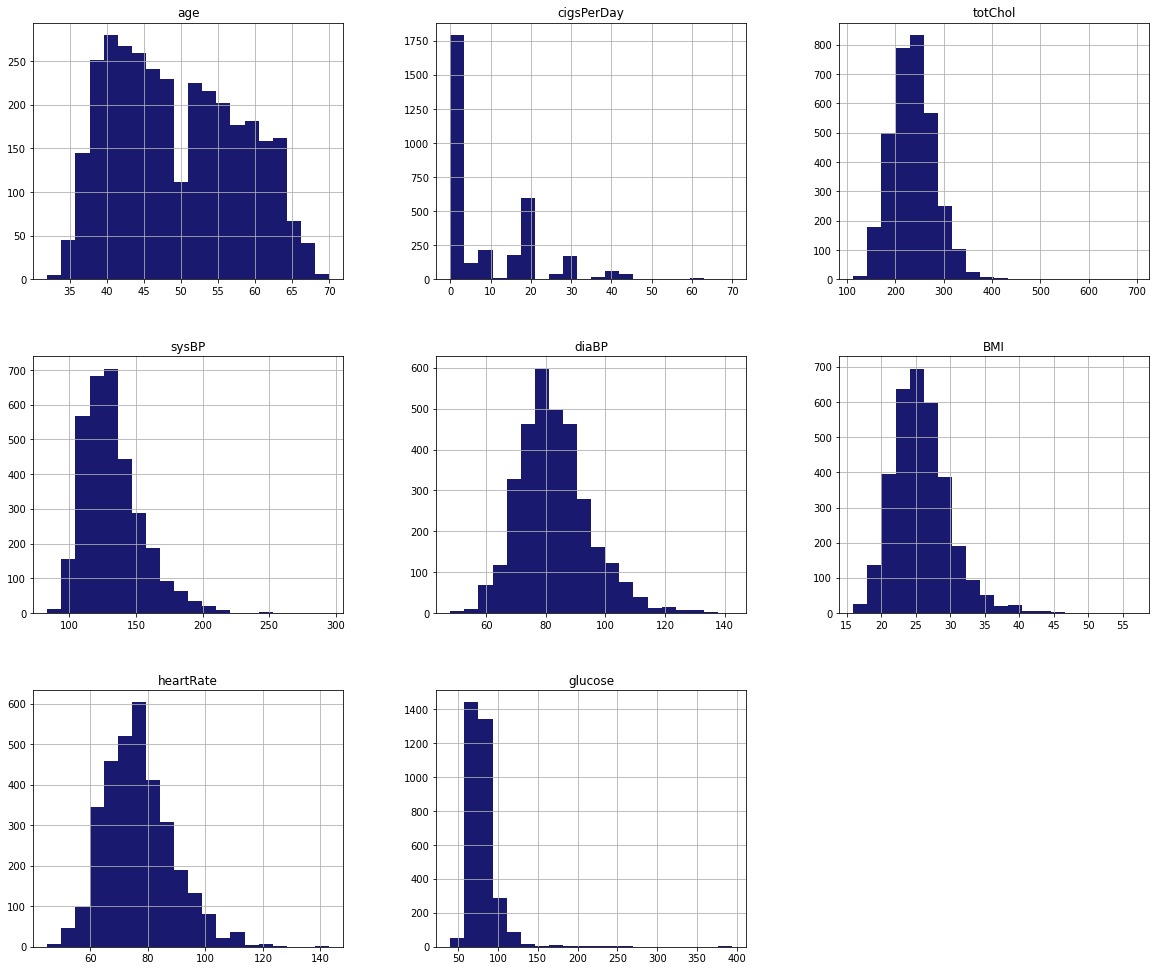

In [ ]:
#Frequency distribution of variables to visualize their distribution
cardio_data[num_variables].hist(bins = 20 , color = "midnightblue", figsize = (20,17))
plt.show()

Inference:

1. All variables follows almost "Normal Distribution" except 'age', 'cigsPerDay', and 'glucose'.

2. The variables 'age', 'cigsPerDay', and 'glucose' shows irregular distribution.


# **Drawing heatmap to compare the correlation between features**

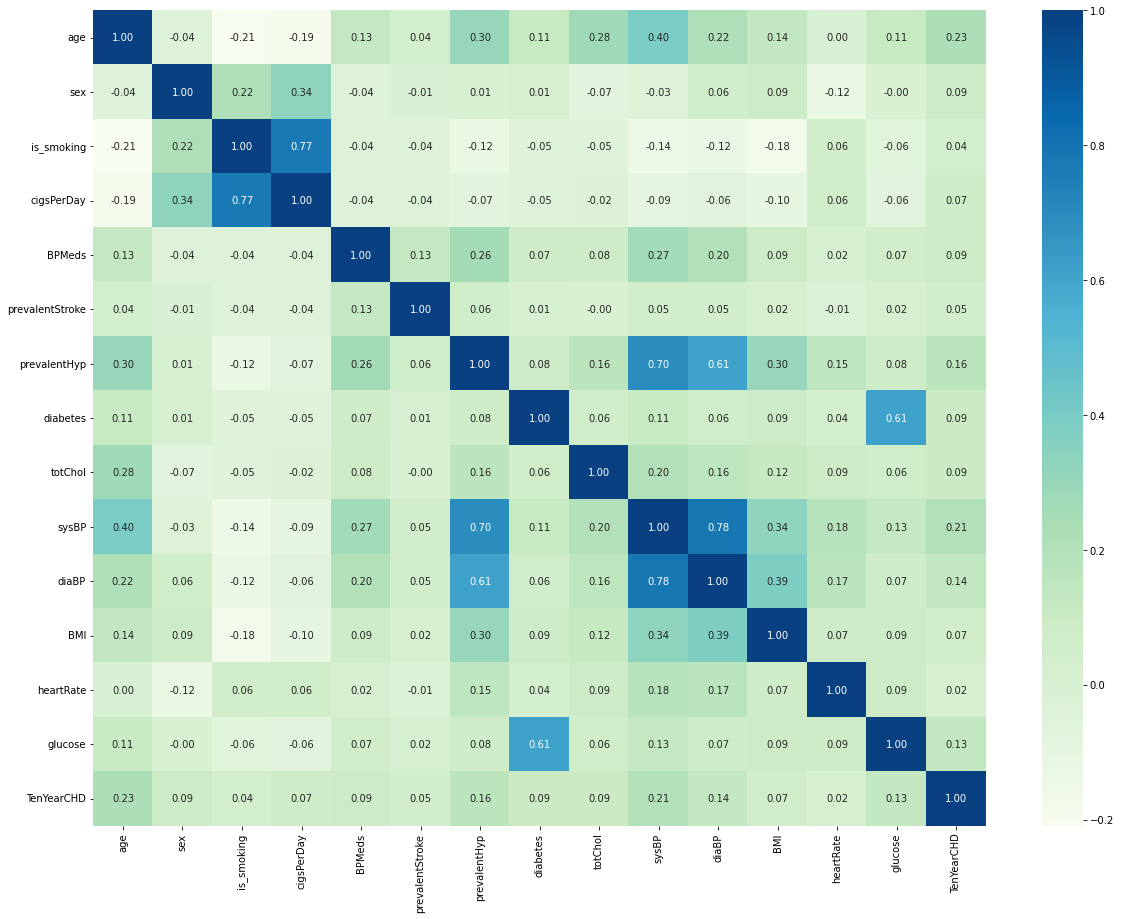

In [ ]:
#Drawing heatmap to compare the correlation between features

#setting figure size
plt.figure(figsize = (20,15))

#creating heatmap
corr = cardio_data.corr()
sns.heatmap(corr, cmap = 'GnBu', annot = True, fmt = '.2f')
plt.show()

Inference:

1. All variables are positively correlated with the target variable. 
2. The  variables cigsPerDay and is_smoking are more positively correlated.
3. The  variables sysBP and diaBP are more positively correlated.
4. The  variable prevalentHyp is more correlated with sysBP.

# **Handling imbalanced data**

In [ ]:
#Creating independent and dependent variables from the given dataset
X = cardio_data.drop('TenYearCHD', axis = 1)
y = cardio_data[['TenYearCHD']]

In [ ]:
#Handling imbalanced data
smote = SMOTE()

#fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

#Printing original and resampled dataset shape
print("Original dataset shape", len(cardio_data))
print("Resampled dataset shape", len(y_smote))

Original dataset shape 3272
Resampled dataset shape 5568


####After resampling the original dataset with 3272 rows, the modified dataset have 5568 rows.

# **Feature Selection**

In [ ]:
#To extract top 10 features using SelectKBest() function
best = SelectKBest(score_func = chi2)

#fit predictor and target variable
fit = best.fit(X_smote, y_smote)

In [ ]:
#Assigning Chi Squared scores to a variable
data_scores = pd.DataFrame(fit.scores_)

#Assigning p-values to a variable
data_pvalues = pd.DataFrame(fit.pvalues_)

#creating a dataframe with feature names in it
data_columns = pd.DataFrame(X_smote.columns)

In [ ]:
#Join three dataframes using concat() function
scores = pd.concat([data_columns, data_scores, data_pvalues], axis = 1)

#Assigning column names 
scores.columns = ['Feature','Chi2 Score', 'p-value']

#Print 11 best sorted Chi-squared score and p-value
print(scores.nlargest(11, 'Chi2 Score'))

         Feature   Chi2 Score        p-value
9          sysBP  1451.817401   0.000000e+00
13       glucose   983.633970  6.481569e-216
8        totChol   734.852680  7.888945e-162
0            age   718.800445  2.440621e-158
3     cigsPerDay   369.835334   2.032577e-82
10         diaBP   336.161183   4.374318e-75
4         BPMeds    48.184695   3.879042e-12
6   prevalentHyp    45.791622   1.315249e-11
7       diabetes    27.528090   1.548294e-07
11           BMI    23.615192   1.176550e-06
2     is_smoking     9.566038   1.982101e-03


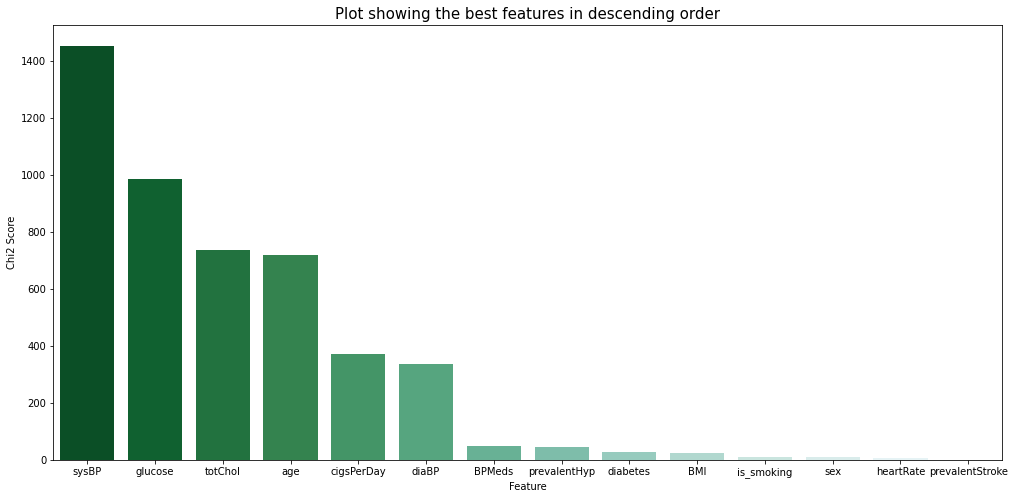

In [ ]:
#To visualize feature selection
#setting figure size
plt.figure(figsize = (17, 8))

#sorting values in descending order using sort_values() function
scores = scores.sort_values(by = 'Chi2 Score', ascending = False)

#creating bar chart
sns.barplot(x = 'Feature', y = 'Chi2 Score', data = scores, palette = 'BuGn_r')

#To display the title of the bar chart
plt.title("Plot showing the best features in descending order", size = 15)
plt.show()

In [ ]:
#Printing top 10 features list
print("These are the top 10 features who have strongest influence over the target variable: \n", scores["Feature"].tolist()[:10])

These are the top 10 features who have strongest influence over the target variable: 
 ['sysBP', 'glucose', 'totChol', 'age', 'cigsPerDay', 'diaBP', 'BPMeds', 'prevalentHyp', 'diabetes', 'BMI']


###For further model evaluation, we decided to remove the four least important features in our dataset (i.e. the features with high p-values and low Chi-squared score). 

In [ ]:
#Dropping the least important features
cardio_data.drop(scores["Feature"].tolist()[-4:], axis = 1, inplace = True)
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3272 entries, 1 to 3389
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           3272 non-null   int64  
 1   cigsPerDay    3272 non-null   float64
 2   BPMeds        3272 non-null   float64
 3   prevalentHyp  3272 non-null   int64  
 4   diabetes      3272 non-null   int64  
 5   totChol       3272 non-null   float64
 6   sysBP         3272 non-null   float64
 7   diaBP         3272 non-null   float64
 8   BMI           3272 non-null   float64
 9   glucose       3272 non-null   float64
 10  TenYearCHD    3272 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 435.8 KB


#**Data Preprocessing**

In [ ]:
#Splitting the dataset into the training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 0)

In [ ]:
#Transforming the data
scaler = StandardScaler()

#Create dummy validation and training set to hold scaled values
s_train = pd.DataFrame(columns = X_train.columns, index = X_train.index)
s_train[s_train.columns] = scaler.fit_transform(X_train)

s_val = pd.DataFrame(columns = X_val.columns, index = X_val.index)
s_val[s_val.columns] = scaler.transform(X_val)

#Assigning dummy datasets to original datasets
X_train = s_train
X_val = s_val

# **Model Implementation**

We will be looking at following algorithms:

1. Logistic Regression
2. Support Vector Machines 
3. KNeighbors Classifier
4. Decision Tree Classifier
5. Random Forest Classifier
6. Gradient Boosting Classifier
7. Extra Trees Classifier
8. XGB (Extreme Gradient Boosting)


In [ ]:
#Creating a list of diiferent models 
models = [
          ['Logistic Regression: ', LogisticRegression()],
          ['SVC: ', SVC(probability = True)],
          ['KNeighbors Classifier: ', KNeighborsClassifier()],
          ['Decision Tree Classifier: ', DecisionTreeClassifier()],
          ['Random Forest: ', RandomForestClassifier()],
          ['Gradient Boosting: ', GradientBoostingClassifier()],
          ['Extra Trees Classifier: ', ExtraTreesClassifier()],
          ['XGB Classifier: ', XGBClassifier()]
          ]

In [ ]:
#Run all the proposed models and update the information in a list model_data

#Creating model_data as an empty list
model_data = []
for name, n_model in models:
    n_model_data = {}

    #Using random seed and random_state to produce the same results across different executions
    np.random.seed(20) 
    n_model.random_state = 0
  
    #Adding names in n_model_data dictionay
    n_model_data["Name"] = name

    #Start time of model
    start = time.time()                                
  
    #Fitting the model
    n_model.fit(X_train, y_train)

    #End time of model
    end = time.time()
    n_model_data["Train Time"] = end - start

    #Get the predicted classes and probabilities
    y_val_pred = n_model.predict(X_val)
    y_val_prob = n_model.predict_proba(X_val)

    #evaluating metrics 
    n_model_data["Accuracy"] = accuracy_score(y_val, y_val_pred)
    n_model_data["Precision"] = precision_score(y_val, y_val_pred)
    n_model_data["Recall"] = recall_score(y_val, y_val_pred)
    n_model_data["f1 Score"] = f1_score(y_val, y_val_pred)
    n_model_data["ROC-AUC Score"] = roc_auc_score(y_val, y_val_prob[:, 1])
    
    #Appending all metrics into model_data list
    model_data.append(n_model_data)

In [ ]:
#Display the list of metrics in different models
model_data

[{'Accuracy': 0.6786355475763016,
  'Name': 'Logistic Regression: ',
  'Precision': 0.6736842105263158,
  'ROC-AUC Score': 0.7407267734199737,
  'Recall': 0.6906474820143885,
  'Train Time': 0.028036832809448242,
  'f1 Score': 0.6820603907637656},
 {'Accuracy': 0.7342908438061041,
  'Name': 'SVC: ',
  'Precision': 0.7159468438538206,
  'ROC-AUC Score': 0.8213203630643872,
  'Recall': 0.7751798561151079,
  'Train Time': 5.354527473449707,
  'f1 Score': 0.7443868739205526},
 {'Accuracy': 0.7836624775583483,
  'Name': 'KNeighbors Classifier: ',
  'Precision': 0.7227722772277227,
  'ROC-AUC Score': 0.8789484541399138,
  'Recall': 0.9190647482014388,
  'Train Time': 0.009180068969726562,
  'f1 Score': 0.8091844813935075},
 {'Accuracy': 0.8159784560143627,
  'Name': 'Decision Tree Classifier: ',
  'Precision': 0.7969543147208121,
  'ROC-AUC Score': 0.8160342693587064,
  'Recall': 0.8471223021582733,
  'Train Time': 0.03582596778869629,
  'f1 Score': 0.8212728857890148},
 {'Accuracy': 0.90394

In [ ]:
#Creating a dataset from model_data to compare the performance of different models
model_data_df = pd.DataFrame(model_data)
model_data_df

,Name,Train Time,Accuracy,Precision,Recall,f1 Score,ROC-AUC Score
0,Logistic Regression:,0.028037,0.678636,0.673684,0.690647,0.682060,0.740727
1,SVC:,5.354527,0.734291,0.715947,0.775180,0.744387,0.821320
2,KNeighbors Classifier:,0.009180,0.783662,0.722772,0.919065,0.809184,0.878948
3,Decision Tree Classifier:,0.035826,0.815978,0.796954,0.847122,0.821273,0.816034
4,Random Forest:,0.770744,0.903950,0.901610,0.906475,0.904036,0.968980
5,Gradient Boosting:,0.993135,0.823160,0.840607,0.796763,0.818098,0.904850
6,Extra Trees Classifier:,0.464608,0.921005,0.914894,0.928058,0.921429,0.977260
7,XGB Classifier:,0.310474,0.807899,0.820225,0.787770,0.803670,0.901690


Inference:

On the basis of validation set performance:

1. The KNeighbors classifier and SVC take the least and most training time, respectively.

2. Extra trees classifier and logistic regression show the highest and lowest performance, respectively.

3. Ensemble models are performing well on the validation set.




**Selected model:**
1. Extra Trees Classifier
2. Random Forest Classifier
3. Gradient Boosting Classifier

In [ ]:
#Creating function to evaluate model metrics
def evaluate_metrics(model_instance, X, y):
    ''' Takes model instance and train or test set (dependent(X) and 
        independent(y) both) as arguments to return a dictionary of accuracy, 
        precision, recall, f1 Score, and ROC-AUC Score for train or test set.
    '''
    
    metr_dict = {}

    #Get the predicted classes and probabilities
    y_pred = model_instance.predict(X)
    y_prob = model_instance.predict_proba(X)
    
    #evaluating metrics 
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1Score = f1_score(y, y_pred)
    ROC_AUC_Score = roc_auc_score(y, y_prob[:, 1])

    #store scores in metr_dict dictionary
    metr_dict["Accuracy"] = accuracy
    metr_dict["Precision"] = precision
    metr_dict["Recall"] = recall
    metr_dict["f1_score"] = f1Score
    metr_dict["roc_auc_Score"] = ROC_AUC_Score

    return metr_dict

In [ ]:
#Creating the dataset to store the performance of selected models
compiled = pd.DataFrame(columns = ["Classifier", "Accuracy", "Precision", 
                                   "Recall", "f1_score", "Roc_Auc_Score"])

# **1. Extra Trees Classifier**

### **Hyperparameter finetuning using GridSearchCV**

In [ ]:
#create the base model to tune
etc = ExtraTreesClassifier(random_state = 0)

#Parameter Grid
param_grid_etc = {'n_estimators' : [70, 80, 92, 112], 
                  'max_depth' : [40, 50, 60, 70, 80],
                  'max_features' : ['auto', 'sqrt', 'log2']
                  }
                  
#Instantiate the grid search model
etc_cv = GridSearchCV(estimator = etc, param_grid = param_grid_etc, cv = 5, n_jobs = -1)
etc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [40, 50, 60, 70, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [70, 80, 92, 112]})

In [ ]:
#Tuned parameter set for Extra Trees Classifier
print("Tuned parameter set: ", etc_cv.best_params_)

Tuned parameter set:  {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 112}


In [ ]:
#Best estimator for Extra Trees Classifier
print(f"Best estimator for Extra Trees Classifier is: {etc_cv.best_estimator_}")

Best estimator for Extra Trees Classifier is: ExtraTreesClassifier(max_depth=50, n_estimators=112, random_state=0)


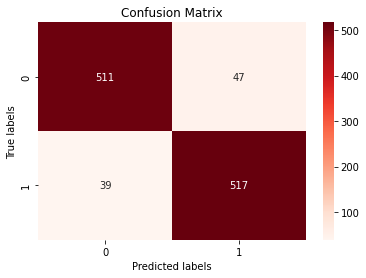

In [ ]:
#create confusion matrix
cm = confusion_matrix(y_val, etc_cv.best_estimator_.predict(X_val))

#create heatmap
ax= plt.subplot()
sns.heatmap(cm, annot = True, cmap = "Reds", fmt = 'g', ax = ax)

#To display the title, xlabel and ylabel of confusion matrix
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

Inference:

1. From the above heatmap, we can conclude that the classifier predicted 564 patients are having 10-year risk of CHD, out of which 517 patients were actually having 10-year risk of CHD and remaining 47 were non-CHD patients.

2. The classifier predicted 550 patients are not having 10-year risk of CHD out of which 511 patients were actually not having 10-year risk of CHD and remaining 39 were CHD patients.


In [ ]:
#Evaluated metrics of validation set
etc_metrics = evaluate_metrics(etc_cv.best_estimator_, X_val, y_val)
print("Evaluated metrics are:")
etc_metrics

Evaluated metrics are:


{'Accuracy': 0.9228007181328546,
 'Precision': 0.9166666666666666,
 'Recall': 0.9298561151079137,
 'f1_score': 0.9232142857142857,
 'roc_auc_Score': 0.9776017895361131}

Inference:
1. Best tuned parameters are 'max_depth' = 50, 'max_features' = 'auto',  'n_estimators' = 112.
2. Improved validation set scores: 
   *  The validation set accuracy is 0.922 over 0.921, which was achieved using the untuned model.
   * The validation set precision is 0.916 over 0.914, which was achieved using the untuned model.
   *  The validation set recall score is 0.929 over 0.928, which was achieved using the untuned model.
   * The validation set f1 score is 0.923 over 0.921, which was achieved using the untuned model.
   * The validation set ROC_AUC_Score is 0.9776 over 0.9772, which was achieved using the untuned model.


In [ ]:
#To print classification_report
print("Classification report:\n \n ", classification_report(y_val, etc_cv.best_estimator_.predict(X_val)))

Classification report:
 
                precision    recall  f1-score   support

           0       0.93      0.92      0.92       558
           1       0.92      0.93      0.92       556

    accuracy                           0.92      1114
   macro avg       0.92      0.92      0.92      1114
weighted avg       0.92      0.92      0.92      1114



Inference:
1. For this model the accuracy score is 0.92.
2. The precision for a patient having 10-year risk of coronary heart disease (CHD) is 0.92 whereas for non-CHD patient is 0.93.
3. Recall for a patient having 10-year risk of coronary heart disease (CHD) is 0.93 whereas for non-CHD patient is 0.92.
4. The f1-score for a patient having a 10-year risk of coronary heart disease (CHD) and for a non-CHD patient is 0.92.
5. The data tested for CHD patient is 556 and for the non-CHD patient is 558.

In [ ]:
#Appending the best hyperparameter and scores with tuned parameters in the compiled df
compiled = compiled.append({"Classifier" : "Extra Trees Classifier",                             
                            "Accuracy" : etc_metrics["Accuracy"],                            
                            "Precision" : etc_metrics["Precision"],                            
                            "Recall" : etc_metrics["Recall"],                           
                            "f1_score" : etc_metrics["f1_score"],                        
                            "Roc_Auc_Score" : etc_metrics["roc_auc_Score"],
                            "Best Hyperparameters" : etc_cv.best_params_ 
                             }, ignore_index = True)

### **Feature Importance**

In [ ]:
#Printing feature importance of best estimator
print("Feature importance of best estimator: \n", etc_cv.best_estimator_.feature_importances_)

Feature importance of best estimator: 
 [0.15052297 0.02091874 0.0227098  0.11109146 0.02379216 0.00210784
 0.01617862 0.00634861 0.11120935 0.12699874 0.10568438 0.09745155
 0.10171394 0.10327184]


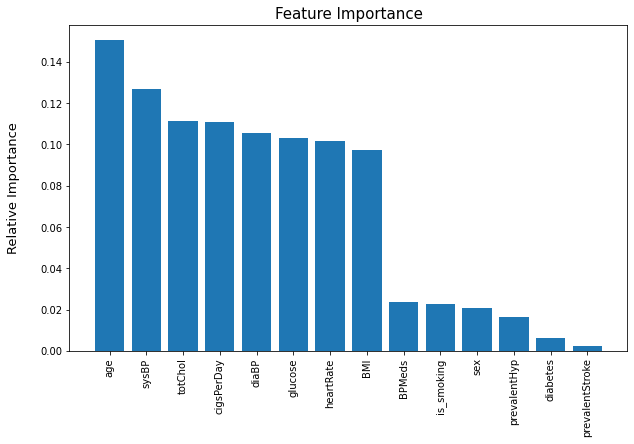

In [ ]:
#Bar chart for feature importance
importances_ = etc_cv.best_estimator_.feature_importances_

#Returning the index of sorted array (importances) 
indices_ = np.argsort(importances_)[::-1]

#Creating a list of features name
names_ = [X_train.columns[i] for i in indices_]

#Create plot
plt.figure(figsize = (10,6))

#Create plot title
plt.title("Feature Importance", fontsize = 15)

#Add bars
plt.bar(range(X_train.shape[1]), importances_[indices_])

#Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names_, rotation = 90)
plt.ylabel('Relative Importance', labelpad = 20, fontsize = 13)

#Show plot
plt.show()

In [ ]:
#Get top 8 important features 
print("Top 8 important features: \n", names_[0:8])

Top 8 important features: 
 ['age', 'sysBP', 'totChol', 'cigsPerDay', 'diaBP', 'glucose', 'heartRate', 'BMI']


In [ ]:
#Get least important features 
print("2 least important features: \n", names_[-2:])

2 least important features: 
 ['diabetes', 'prevalentStroke']


In [ ]:
#Reduce test & validation set to 8 feature set
train_imp_feature_etc = X_train[names_[0:8]]
val_imp_feature_etc = X_val[names_[0:8]]

In [ ]:
#Clone the GridSearch model with its parameter and fit on reduced dataset
cloned_model_etc = clone(etc_cv.best_estimator_)
cloned_model_etc.fit(train_imp_feature_etc, y_train)

ExtraTreesClassifier(max_depth=50, n_estimators=112, random_state=0)

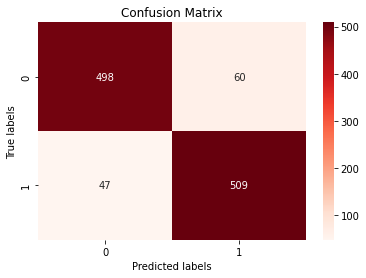

In [ ]:
#create confusion matrix
cm = confusion_matrix(y_val, cloned_model_etc.predict(val_imp_feature_etc))

#create heatmap
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap="Reds", fmt='g',ax = ax)

#To display the title, xlabel and ylabel of confusion matrix
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [ ]:
#Evaluated metrics
print("Evaluated metrics are:")
evaluate_metrics(cloned_model_etc, val_imp_feature_etc, y_val)

Evaluated metrics are:


{'Accuracy': 0.9039497307001796,
 'Precision': 0.8945518453427065,
 'Recall': 0.9154676258992805,
 'f1_score': 0.9048888888888889,
 'roc_auc_Score': 0.9695501663185581}

In [ ]:
#To print classification_report
print("Classification report:\n \n ", classification_report(y_val, cloned_model_etc.predict(val_imp_feature_etc)))

Classification report:
 
                precision    recall  f1-score   support

           0       0.91      0.89      0.90       558
           1       0.89      0.92      0.90       556

    accuracy                           0.90      1114
   macro avg       0.90      0.90      0.90      1114
weighted avg       0.90      0.90      0.90      1114



Inference:
1. Feature importance was not able to improve the performance of the tuned model as the accuracy score of the model drops from 0.92 to 0.90.
2. No improvement in precision, recall, f1-score, and ROC-AUC score as compared to tuned model.
3. We can observe from the confusion matrix, that the classifier prediction is performing badly after feature importance. Therefore, we will not consider feature importance in this model.

# **2. Random Forest Classifier**

### **Hyperparameter finetuning using GridSearchCV**

In [ ]:
#create the base model to tune
rfc = RandomForestClassifier(random_state = 0)

#Parameter Grid
param_grid_rfc = {'n_estimators' : [10, 40, 60, 92], 
                  'max_depth' : [30, 50, 80, 100],
                  'max_features' : ['auto', 'sqrt', 'log2']
                  }

#Instantiate the grid search model 
rfc_cv = GridSearchCV(estimator = rfc, param_grid = param_grid_rfc, cv = 5, n_jobs = -1)
rfc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [30, 50, 80, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 40, 60, 92]})

In [ ]:
#Tuned parameter set for Random Forest Classifier
print("Tuned parameter set: ", rfc_cv.best_params_)

Tuned parameter set:  {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 92}


In [ ]:
#Best estimator for Random Forest Classifier
print("Best estimator for Random Forest Classifier is: ", rfc_cv.best_estimator_)

Best estimator for Random Forest Classifier is:  RandomForestClassifier(max_depth=50, n_estimators=92, random_state=0)


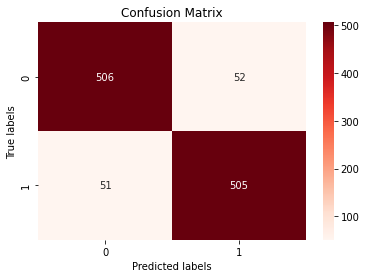

In [ ]:
#create confusion matrix
cm = confusion_matrix(y_val, rfc_cv.best_estimator_.predict(X_val))

#create heatmap
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap="Reds", fmt='g',ax = ax)

#To display the title, xlabel and ylabel of confusion matrix
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

Inference:

1. From the above heatmap, we can conclude that the classifier predicted 557 patients are having 10-year risk of CHD, out of which 505 patients were actually having 10-year risk of CHD and remaining 52 were non-CHD patients.

2. The classifier predicted 557 patients are not having 10-year risk of CHD out of which 506 patients were actually not having 10-year risk of CHD and remaining 51 were CHD patients.


In [ ]:
#Evaluated metrics of validation set
rfc_metrics = evaluate_metrics(rfc_cv.best_estimator_, X_val, y_val)
print("Evaluated metrics are:")
rfc_metrics

Evaluated metrics are:


{'Accuracy': 0.90754039497307,
 'Precision': 0.9066427289048474,
 'Recall': 0.908273381294964,
 'f1_score': 0.9074573225516622,
 'roc_auc_Score': 0.9686073721667827}

Inference:
1. Best tuned parameters are 'max_depth' = 50, 'max_features' = 'auto',  'n_estimators' = 92.
2. Improved validation set scores: 
   *  The validation set accuracy is 0.907 over 0.903, which was achieved using the untuned model.
   * The validation set precision is 0.906 over 0.901, which was achieved using the untuned model.
   *  The validation set recall score is 0.908 over 0.906, which was achieved using the untuned model.
   * The validation set f1 score is 0.907 over 0.904, which was achieved using the untuned model.


In [ ]:
#Appending the best hyperparameter and scores with tuned parameters in the compiled df
compiled = compiled.append({"Classifier" : "Random Forest Classifier",                            
                            "Accuracy" : rfc_metrics["Accuracy"],                            
                            "Precision" : rfc_metrics["Precision"],                            
                            "Recall" : rfc_metrics["Recall"],                            
                            "f1_score" : rfc_metrics["f1_score"],                         
                            "Roc_Auc_Score" : rfc_metrics["roc_auc_Score"],
                            "Best Hyperparameters" : rfc_cv.best_params_ 
                             }, ignore_index = True)

In [ ]:
#To print classification_report
print("Classification report:\n \n ", classification_report(y_val, rfc_cv.best_estimator_.predict(X_val)))

Classification report:
 
                precision    recall  f1-score   support

           0       0.91      0.91      0.91       558
           1       0.91      0.91      0.91       556

    accuracy                           0.91      1114
   macro avg       0.91      0.91      0.91      1114
weighted avg       0.91      0.91      0.91      1114



Inference:
1. For this model the accuracy score is 0.91.
2. The precision for a patient having 10-year risk of coronary heart disease (CHD) is 0.91 whereas for non-CHD patient is also 0.91.
3. Recall for a patient having 10-year risk of coronary heart disease (CHD) is 0.91 whereas for non-CHD patient is also 0.91.
4. The f1-score for a patient having a 10-year risk of coronary heart disease (CHD) and for a non-CHD patient is 0.91.
5. The data tested for CHD patient is 556 and for the non-CHD patient is 558.

### **Feature Importance**

In [ ]:
#Printing feature importance of best estimator
print("Feature importance of best estimator: \n", rfc_cv.best_estimator_.feature_importances_)

Feature importance of best estimator: 
 [0.14165518 0.01478537 0.03605265 0.09364127 0.02001049 0.00103893
 0.01342504 0.00409284 0.11891429 0.13512786 0.10733153 0.09870003
 0.11066575 0.10455878]


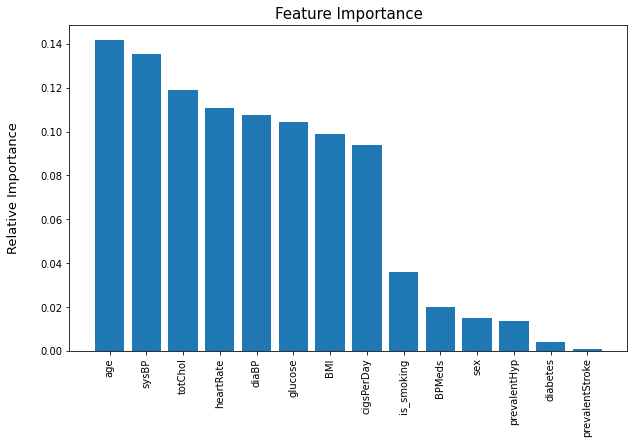

In [ ]:
#Bar chart for feature importance

importances = rfc_cv.best_estimator_.feature_importances_

#Returning the index of sorted array (importances)
indices = np.argsort(importances)[::-1]

#Creating a list of features name
names = [X_train.columns[i] for i in indices]

#Create plot
plt.figure(figsize = (10,6))

#Create plot title
plt.title("Feature Importance", fontsize = 15)

#Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

#Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.ylabel('Relative Importance', labelpad = 20, fontsize = 13)

#Show plot
plt.show()

In [ ]:
#Get top 8 important features 
print("Top 8 important features: \n", names[0:8])

Top 8 important features: 
 ['age', 'sysBP', 'totChol', 'heartRate', 'diaBP', 'glucose', 'BMI', 'cigsPerDay']


In [ ]:
#Get least important features 
print("2 least important features: \n", names[-2:])

2 least important features: 
 ['diabetes', 'prevalentStroke']


In [ ]:
#Reduce test & validation set to 8 feature set
train_imp_feature_rfc = X_train[names[0:8]]
val_imp_feature_rfc = X_val[names[0:8]]

In [ ]:
#Clone the GridSearch model with its parameter and fit on reduced dataset
cloned_model_rfc = clone(rfc_cv.best_estimator_)
cloned_model_rfc.fit(train_imp_feature_rfc, y_train)

RandomForestClassifier(max_depth=50, n_estimators=92, random_state=0)

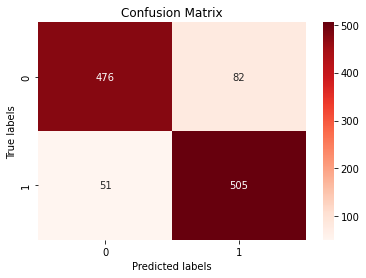

In [ ]:
#create confusion matrix
cm = confusion_matrix(y_val, cloned_model_rfc.predict(val_imp_feature_rfc))

#create heatmap
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap="Reds", fmt='g',ax = ax)

#To display the title, xlabel and ylabel of confusion matrix
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [ ]:
#Evaluated metrics
print("Evaluated metrics are:")
evaluate_metrics(cloned_model_rfc, val_imp_feature_rfc, y_val)

Evaluated metrics are:


{'Accuracy': 0.8806104129263914,
 'Precision': 0.8603066439522998,
 'Recall': 0.908273381294964,
 'f1_score': 0.8836395450568679,
 'roc_auc_Score': 0.9551552306541864}

In [ ]:
#To print classification_report
print("Classification report:\n \n ", classification_report(y_val, cloned_model_rfc.predict(val_imp_feature_rfc)))

Classification report:
 
                precision    recall  f1-score   support

           0       0.90      0.85      0.88       558
           1       0.86      0.91      0.88       556

    accuracy                           0.88      1114
   macro avg       0.88      0.88      0.88      1114
weighted avg       0.88      0.88      0.88      1114



Inference:
1. Feature importance was not able to improve the performance of the tuned model as the accuracy score of the model drops from 0.91 to 0.88.
2. No improvement in precision, recall, f1-score, and ROC-AUC score as compared to tuned model.
3. We can observe from the confusion matrix, that the classifier prediction is performing badly after feature importance. Therefore, we will not consider feature importance in this model.

# **3. Gradient Boosting Classifier**

### **Hyperparameter finetuning using GridSearchCV**

In [ ]:
#create the base model to tune
gbc = GradientBoostingClassifier(random_state = 0)

#Parameter Grid
param_grid_gbc = {'n_estimators' : [20, 35, 50, 100], 
                  'max_depth' : [10, 20, 30, 50],
                  'max_features' : ['auto', 'sqrt', 'log2']
                  }
                  
#Instantiate the grid search model
gbc_cv = GridSearchCV(estimator = gbc, param_grid = param_grid_gbc, cv = 5, n_jobs = -1)
gbc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 35, 50, 100]})

In [ ]:
#Tuned parameter set for Gradient Boosting Classifier
print("Tuned parameter set: ", gbc_cv.best_params_)

Tuned parameter set:  {'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 100}


In [ ]:
#Best estimator for Gradient Boosting Classifier
print("Best estimator for Gradient Boosting Classifier is: ", gbc_cv.best_estimator_)

Best estimator for Gradient Boosting Classifier is:  GradientBoostingClassifier(max_depth=50, max_features='sqrt', random_state=0)


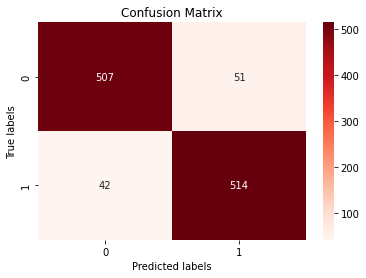

In [ ]:
#create confusion matrix
cm = confusion_matrix(y_val, gbc_cv.best_estimator_.predict(X_val))

#create heatmap
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap="Reds", fmt='g',ax = ax)

#To display the title, xlabel and ylabel of confusion matrix
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

Inference:

1. From the above heatmap, we can conclude that the classifier predicted 565 patients are having 10-year risk of CHD, out of which 514 patients were actually having 10-year risk of CHD and remaining 51 were non-CHD patients.

2. The classifier predicted 549 patients are not having 10-year risk of CHD out of which 507 patients were actually not having 10-year risk of CHD and remaining 42 were CHD patients.


In [ ]:
#Evaluated metrics of validation set
gbc_metrics = evaluate_metrics(gbc_cv.best_estimator_, X_val, y_val)
print("Evaluated metrics are:")
gbc_metrics

Evaluated metrics are:


{'Accuracy': 0.9165170556552962,
 'Precision': 0.9097345132743363,
 'Recall': 0.9244604316546763,
 'f1_score': 0.9170383586083855,
 'roc_auc_Score': 0.9762415873752611}

Inference:
1. Best tuned parameters are 'max_depth' = 50, 'max_features' = 'sqrt',  'n_estimators' = 100.
2. Improved validation set scores: 
   *  The validation set accuracy is 0.916 over 0.823, which was achieved using the untuned model.
   * The validation set precision is 0.909 over 0.840, which was achieved using the untuned model.
   *  The validation set recall score is 0.924 over 0.796, which was achieved using the untuned model.
   * The validation set f1 score is 0.917 over 0.818, which was achieved using the untuned model.
   * The validation set ROC_AUC_Score is 0.9762 over 0.904, which was achieved using the untuned model.

In [ ]:
#To print classification_report
print("Classification report:\n \n ", classification_report(y_val, gbc_cv.best_estimator_.predict(X_val)))

Classification report:
 
                precision    recall  f1-score   support

           0       0.92      0.91      0.92       558
           1       0.91      0.92      0.92       556

    accuracy                           0.92      1114
   macro avg       0.92      0.92      0.92      1114
weighted avg       0.92      0.92      0.92      1114



Inference:
1. For this model the accuracy score is 0.92.
2. The precision for a patient having 10-year risk of coronary heart disease (CHD) is 0.91 whereas for non-CHD patient is 0.92.
3. Recall for a patient having 10-year risk of coronary heart disease (CHD) is 0.92 whereas for non-CHD patient is 0.91.
4. The f1-score for a patient having a 10-year risk of coronary heart disease (CHD) and for a non-CHD patient is 0.92.
5. The data tested for CHD patient is 556 and for the non-CHD patient is 558.

In [ ]:
#Appending the best hyperparameter and scores with tuned parameters in the compiled df
compiled = compiled.append({"Classifier" : "Gradient Boosting Classifier",                             
                            "Accuracy" : gbc_metrics["Accuracy"],                             
                            "Precision" : gbc_metrics["Precision"],                             
                            "Recall" : gbc_metrics["Recall"],                            
                            "f1_score" : gbc_metrics["f1_score"],                           
                            "Roc_Auc_Score" : gbc_metrics["roc_auc_Score"],
                            "Best Hyperparameters" : gbc_cv.best_params_ 
                             }, ignore_index = True)

### **Feature Importance**

In [ ]:
#Printing feature importance of best estimator
print("Feature importance of best estimator: \n", gbc_cv.best_estimator_.feature_importances_)

Feature importance of best estimator: 
 [0.13796749 0.0147781  0.04163252 0.09458087 0.01673708 0.00090729
 0.01292815 0.00386279 0.12134306 0.13529487 0.10529414 0.09344075
 0.1145954  0.10663748]


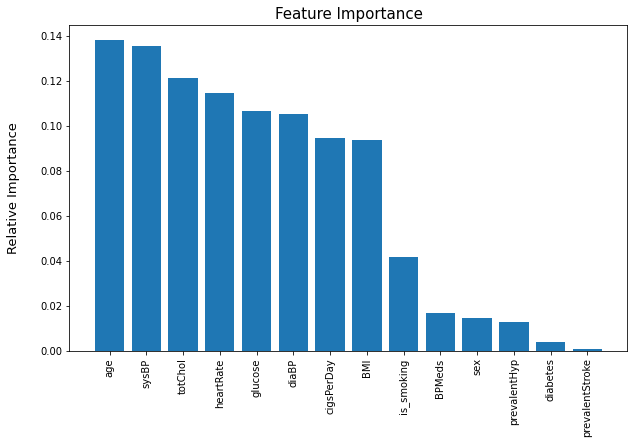

In [ ]:
#Bar chart for feature importance
_importances_ = gbc_cv.best_estimator_.feature_importances_

#Returning the index of sorted array (importances) 
_indices_ = np.argsort(_importances_)[::-1]

#Creating a list of features name
_names_ = [X_train.columns[i] for i in _indices_]

#Create plot
plt.figure(figsize = (10,6))

#Create plot title
plt.title("Feature Importance", fontsize = 15)

#Add bars
plt.bar(range(X_train.shape[1]), _importances_[_indices_])

#Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), _names_, rotation = 90)
plt.ylabel('Relative Importance', labelpad = 20, fontsize = 13)

#Show plot
plt.show()

In [ ]:
#Get top 8 important features 
print("Top 8 important features: \n", _names_[0:8])

Top 8 important features: 
 ['age', 'sysBP', 'totChol', 'heartRate', 'glucose', 'diaBP', 'cigsPerDay', 'BMI']


In [ ]:
#Get least important features 
print("2 least important features: \n", _names_[-2:])

2 least important features: 
 ['diabetes', 'prevalentStroke']


In [ ]:
#Reduce test & validation set to 8 feature set
train_imp_feature_gbc = X_train[_names_[0:8]]
val_imp_feature_gbc = X_val[_names_[0:8]]

In [ ]:
#Clone the GridSearch model with its parameter and fit on reduced dataset
cloned_model_gbc = clone(gbc_cv.best_estimator_)
cloned_model_gbc.fit(train_imp_feature_gbc, y_train)

GradientBoostingClassifier(max_depth=50, max_features='sqrt', random_state=0)

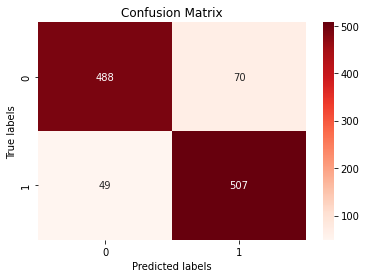

In [ ]:
#create confusion matrix
cm = confusion_matrix(y_val, cloned_model_gbc.predict(val_imp_feature_gbc))

#create heatmap
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap="Reds", fmt='g',ax = ax)

#To display the title, xlabel and ylabel of confusion matrix
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [ ]:
#Evaluated metrics 
print("Evaluated metrics are:")
evaluate_metrics(cloned_model_gbc, val_imp_feature_gbc, y_val)

Evaluated metrics are:


{'Accuracy': 0.8931777378815081,
 'Precision': 0.878682842287695,
 'Recall': 0.9118705035971223,
 'f1_score': 0.8949691085613416,
 'roc_auc_Score': 0.9637548026095252}

In [ ]:
#To print classification_report
print("Classification report:\n \n ", classification_report(y_val, cloned_model_gbc.predict(val_imp_feature_gbc)))

Classification report:
 
                precision    recall  f1-score   support

           0       0.91      0.87      0.89       558
           1       0.88      0.91      0.89       556

    accuracy                           0.89      1114
   macro avg       0.89      0.89      0.89      1114
weighted avg       0.89      0.89      0.89      1114



Inference:
1. Feature importance was not able to improve the performance of the tuned model as the accuracy score of the model drops from 0.92 to 0.89.
2. No improvement in precision, recall, f1-score, and ROC-AUC score as compared to tuned model.
3. We can observe from the confusion matrix, that the classifier prediction is performing badly after feature importance. Therefore, we will not consider feature importance in this model.


# **Stacking**

In [ ]:
#setting estimators
estimators = [('ET', etc_cv.best_estimator_), ('GB', gbc_cv.best_estimator_ ), ('RF', rfc_cv.best_estimator_)]

#create the base model to fit
sc = StackingClassifier(estimators = estimators, final_estimator = gbc)
sc.fit(X_train, y_train)

StackingClassifier(estimators=[('ET',
                                ExtraTreesClassifier(max_depth=50,
                                                     n_estimators=112,
                                                     random_state=0)),
                               ('GB',
                                GradientBoostingClassifier(max_depth=50,
                                                           max_features='sqrt',
                                                           random_state=0)),
                               ('RF',
                                RandomForestClassifier(max_depth=50,
                                                       n_estimators=92,
                                                       random_state=0))],
                   final_estimator=GradientBoostingClassifier(random_state=0))

In [ ]:
#Evaluated metrics of validation set
sc_metrics = evaluate_metrics(sc, X_val, y_val)
print("Evaluated metrics are:")
sc_metrics

Evaluated metrics are:


{'Accuracy': 0.9290843806104129,
 'Precision': 0.9424860853432282,
 'Recall': 0.9136690647482014,
 'f1_score': 0.9278538812785387,
 'roc_auc_Score': 0.9793342745158712}

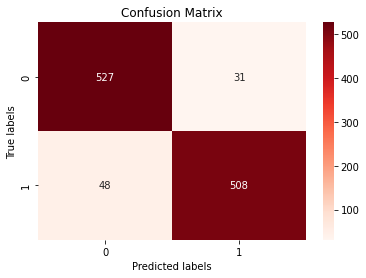

In [ ]:
#create confusion matrix
cm_sc = confusion_matrix(y_val, sc.predict(X_val))

#create heatmap
ax= plt.subplot()
sns.heatmap(cm_sc, annot = True, cmap = "Reds", fmt = 'g', ax = ax)

#To display the title, xlabel and ylabel of confusion matrix
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

Inference:

1. From the above heatmap, we can conclude that the classifier predicted 539 patients are having 10-year risk of CHD, out of which 508 patients were actually having 10-year risk of CHD and remaining 31 were non-CHD patients.

2. The classifier predicted 575 patients are not having 10-year risk of CHD out of which 527 patients were actually not having 10-year risk of CHD and remaining 48 were CHD patients.

In [ ]:
#To print classification report
print("Classification report:\n \n ", classification_report(y_val, sc.predict(X_val)))

Classification report:
 
                precision    recall  f1-score   support

           0       0.92      0.94      0.93       558
           1       0.94      0.91      0.93       556

    accuracy                           0.93      1114
   macro avg       0.93      0.93      0.93      1114
weighted avg       0.93      0.93      0.93      1114



Inference:
1. For this model the accuracy score is 0.93.
2. The precision for a patient having 10-year risk of coronary heart disease (CHD) is 0.94 whereas for non-CHD patient is 0.92.
3. Recall for a patient having 10-year risk of coronary heart disease (CHD) is 0.91 whereas for non-CHD patient is 0.94.
4. The f1-score for a patient having a 10-year risk of coronary heart disease (CHD) and for a non-CHD patient is 0.93.
5. The data tested for CHD patient is 556 and for the non-CHD patient is 558.

In [ ]:
#Appending the best hyperparameter and scores with tuned parameters in the compiled dataset
compiled = compiled.append({"Classifier" : "Stacking",                             
                            "Accuracy" : sc_metrics["Accuracy"],                            
                            "Precision" : sc_metrics["Precision"],                             
                            "Recall" : sc_metrics["Recall"],                             
                            "f1_score" : sc_metrics["f1_score"],                            
                            "Roc_Auc_Score" : sc_metrics["roc_auc_Score"],
                            "Best Hyperparameters" : "NA"
                             }, ignore_index = True)

#**Comparing models performance**

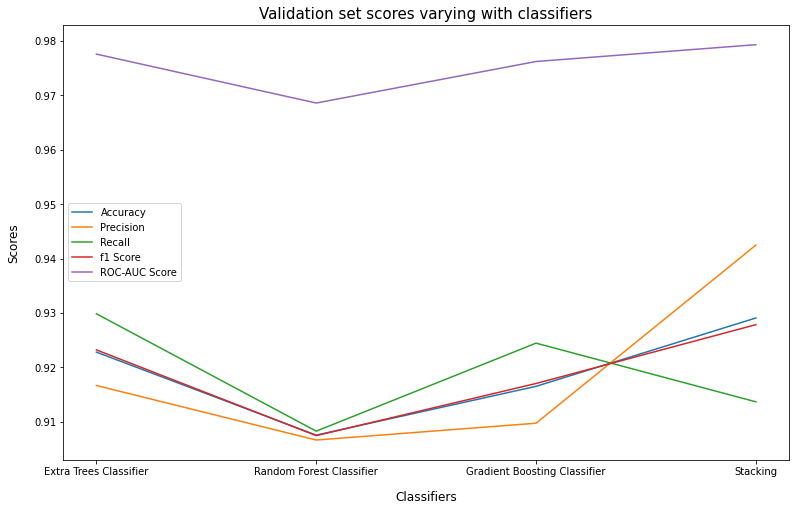

In [ ]:
#Plotting a line chart to visualise the variation in model's performance

#setting figure size
plt.figure(figsize=(13, 8))

#creating line chart 
plt.plot(compiled["Classifier"], compiled["Accuracy"], label='Accuracy')
plt.plot(compiled["Classifier"], compiled["Precision"], label='Precision')
plt.plot(compiled["Classifier"], compiled["Recall"], label='Recall')
plt.plot(compiled["Classifier"], compiled["f1_score"], label='f1 Score')
plt.plot(compiled["Classifier"], compiled["Roc_Auc_Score"], label='ROC-AUC Score')
plt.legend()

#To display the x label, y label and title of the line chart
plt.xlabel("Classifiers", labelpad=14, fontsize = 12)
plt.ylabel("Scores", labelpad=14, fontsize = 12)
plt.title("Validation set scores varying with classifiers", fontsize = 15)
plt.show()

In [ ]:
#To display all models performance in the compiled dataset
compiled

,Classifier,Accuracy,Precision,Recall,f1_score,Roc_Auc_Score,Best Hyperparameters
0,Extra Trees Classifier,0.922801,0.916667,0.929856,0.923214,0.977602,"{'max_depth': 50, 'max_features': 'auto', 'n_e..."
1,Random Forest Classifier,0.907540,0.906643,0.908273,0.907457,0.968607,"{'max_depth': 50, 'max_features': 'auto', 'n_e..."
2,Gradient Boosting Classifier,0.916517,0.909735,0.924460,0.917038,0.976242,"{'max_depth': 50, 'max_features': 'sqrt', 'n_e..."
3,Stacking,0.929084,0.942486,0.913669,0.927854,0.979334,NA


Inference:

1. Accuracy, precision, f1 score, and ROC-AUC score are high for stacking.

2. Recall is high for extra trees classifier.

# **Conclusion**

1. Out of 3 selected models, the extra trees classifier was found to be the best performing. 

2. Further feature reduction in any of the selected models didn't add to the scores.

3. Stacking, on the other hand, surpassed the performance of selected models.
4. The final model had 11 features.

5. The best algorithm to use for this dataset is stacking, as the best results for the validation set are given by stacking with an accuracy of 0.93 and a ROC-AUC score of 0.98. 

6. Stacking predicted that 539/1114 patients have a 10-year risk of future CHD and 575/1114 patients don’t. The precision, recall, and f1-score for a patient having a 10-year risk of future CHD are 0.94, 0.91, and 0.93, respectively, whereas for non-CHD patients are 0.92, 0.94, and 0.93, respectively.
